<a href="https://colab.research.google.com/github/esrayuzgec/ALZHEIMER_TEZ/blob/main/cnmild_squeeze_withloss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
     

In [2]:
from fastai.vision.all import *
from fastbook import *
     

In [3]:
path = Path("/content/gdrive/MyDrive/OASISCNMILD/Train")

In [4]:

path.ls()

(#20) [Path('/content/gdrive/MyDrive/OASISCNMILD/Train/MILD'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_new_ConvNext.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILDnew_convnext.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILDnew_convnext_.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_new_ConvNext_.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILDnew_resnet18_.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_new_resnet18_.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILDnew_resnet50_.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_new_resnet50_.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train/oas-40epoch-resnet-50.pth')...]

In [5]:
train_fnames = get_image_files(path)


In [6]:

item_tfms=Resize(216)
batch_tfms=aug_transforms=[Normalize.from_stats(*imagenet_stats)]
     

In [7]:

braindb = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.1, seed = 42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )
dls = braindb.dataloaders(path,bs=32)

In [8]:
learn = vision_learner(dls, squeezenet1_0, loss_func=CrossEntropyLossFlat(), metrics=accuracy)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0020892962347716093)

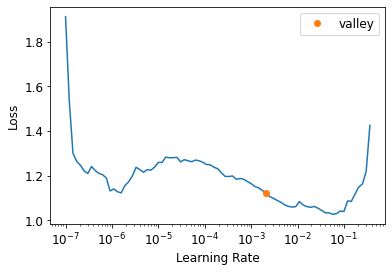

In [9]:
learn.lr_find()


In [10]:
learn.fine_tune(50,1.1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.712375,0.324079,0.868132,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.472609,0.275249,0.879121,00:15
1,0.403301,0.237599,0.905495,00:14
2,0.320069,0.208347,0.914286,00:14
3,0.321720,0.172226,0.929670,00:14
4,0.285160,0.146904,0.940659,00:15
5,0.249186,0.126895,0.956044,00:14
6,0.215684,0.115250,0.953846,00:14
7,0.186473,0.097291,0.967033,00:14
8,0.176676,0.096043,0.964835,00:14
9,0.141557,0.067737,0.971429,00:14


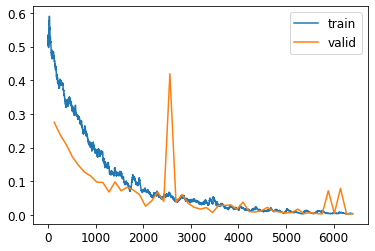

In [11]:
learn.recorder.plot_loss()


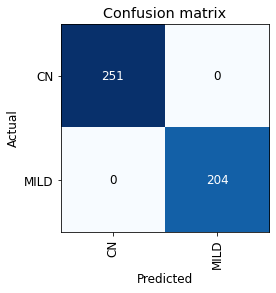

In [12]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

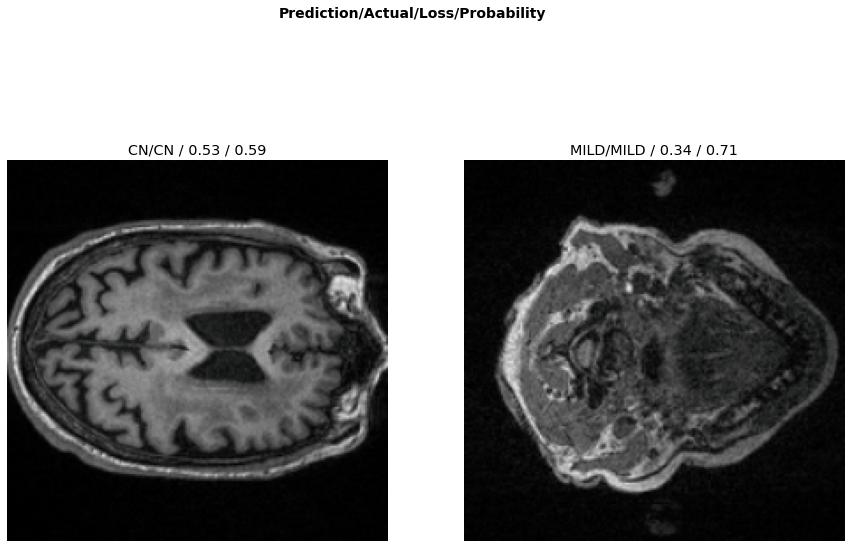

In [13]:

interp.plot_top_losses(2, figsize=(15,10))

In [14]:

interp.most_confused()


[]

In [15]:

interp.print_classification_report()

              precision    recall  f1-score   support

          CN       1.00      1.00      1.00       251
        MILD       1.00      1.00      1.00       204

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [16]:
learn.save(path/'CNMILD_SqueezeNet_Train')

Path('/content/gdrive/MyDrive/OASISCNMILD/Train/CNMILD_SqueezeNet_Train.pth')

In [17]:

learn.export(path/'CNMILD_SqueezeNet_Train.pkl')


In [18]:
path = Path("/content/gdrive/MyDrive/OASISCNMILD")

In [19]:
all_files= get_image_files(path)

In [20]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                 get_y=parent_label,
                 item_tfms=Resize(216),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
)

In [21]:
dls_test = dblock.dataloaders(all_files)

In [22]:
print("Number of examples in testing:", len(dls_test.valid_ds))


Number of examples in testing: 1287


In [23]:
learn1 = vision_learner(dls_test, squeezenet1_0, metrics=accuracy).load('/content/gdrive/MyDrive/OASISCNMILD/CNMILD_SqueezeNet_Train')


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


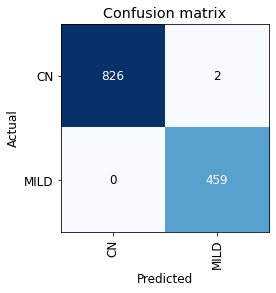

In [24]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [25]:

preds, targs = learn1.tta()
accuracy(preds, targs).item()
     

0.999222993850708

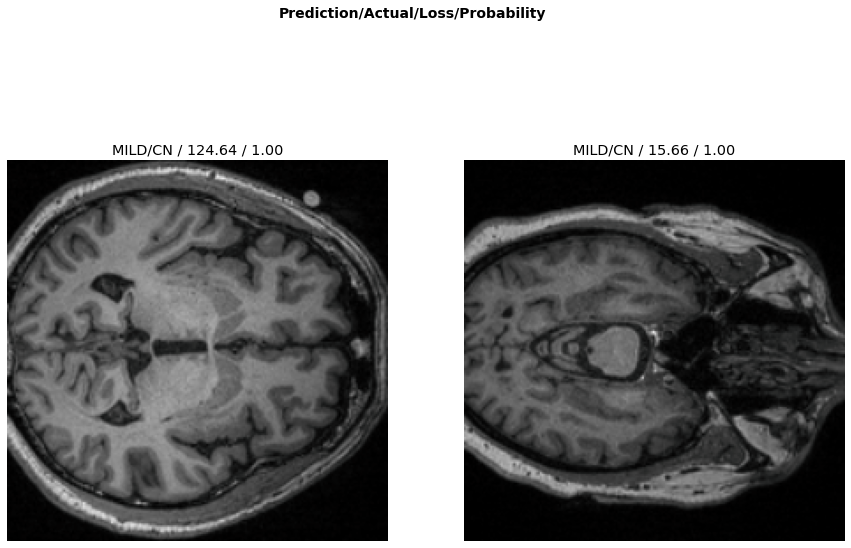

In [26]:
interp.plot_top_losses(2, figsize=(15,10))

In [76]:
learn_inf = load_learner('/content/gdrive/MyDrive/OASISCNMILD/CNMILD_SqueezeNet_Train.pkl')
